### Data Wrangling, I
Perform the following operations using Python on any open source dataset (e.g., data.csv)
1. Import all the required Python Libraries.
2. Locate an open source data from the web (e.g. https://www.kaggle.com). Provide a clear
description of the data and its source (i.e., URL of the website).
3. Load the Dataset into pandas data frame.
4. Data Preprocessing: check for missing values in the data using pandas insult(), describe()
function to get some initial statistics. Provide variable descriptions. Types of variables
etc. Check the dimensions of the data frame.
5. Data Formatting and Data Normalization: Summarize the types of variables by checking
the data types (i.e., character, numeric, integer, factor, and logical) of the variables in the
data set. If variables are not in the correct data type, apply proper type conversions.
6. Turn categorical variables into quantitative variables in Python.

In [10]:
#1. Import all the required Python Libraries.
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [11]:
#2. Locate an open source data from the web (e.g. https://www.kaggle.com). Provide a clear
#description of the data and its source (i.e., URL of the website).
#Site = https://github.com/AkshadC/ML/blob/master/Models/LinearRegressionModel/Real_Life_Example_Cars_Model/1.04.%20Real-life%20example.csv


#3.Load the Dataset into pandas data frame.
raw_data_file = pd.read_csv('1.04. Real-life example.csv')
raw_data_file.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### 4. Data Preprocessing: check for missing values in the data using pandas insult(), describe()
function to get some initial statistics. Provide variable descriptions. Types of variables
etc. Check the dimensions of the data frame.

In [12]:
raw_data_file.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [13]:
raw_data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [14]:
null_count = raw_data_file.isnull().sum()
missing_list = []
for col_name, count in null_count.items():
    if count > 0:
        missing_list.append(str(col_name))
print(missing_list)

['Price', 'EngineV']


In [15]:
for missing in missing_list:
    raw_data_file[missing] = raw_data_file[missing].fillna(raw_data_file[missing].mean())
raw_data_file.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

### 6. Turn categorical variables into quantitative variables in Python.

In [16]:
df_with_dummies = pd.get_dummies(raw_data_file, drop_first=True)
df_with_dummies

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.000000,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.900000,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.000000,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.200000,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.000000,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,125000.0,9,3.000000,2014,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,6500.0,1,3.500000,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,8000.0,194,2.000000,1985,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4343,14200.0,31,2.790734,2014,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Data Formatting and Data Normalization: Summarize the types of variables by checking
the data types (i.e., character, numeric, integer, factor, and logical) of the variables in the
data set. If variables are not in the correct data type, apply proper type conversions.

In [17]:
#STANDARDIZATION
standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(df_with_dummies)
# after standardization
scaled

array([[-6.07056440e-01,  1.09526670e+00, -1.58857796e-01, ...,
        -5.68551652e-02, -1.51724282e-02, -3.39422117e-02],
       [-4.59468151e-01,  2.51446288e+00,  2.19514002e-02, ...,
        -5.68551652e-02, -1.51724282e-02, -3.39422117e-02],
       [-2.44069026e-01,  1.86163264e+00,  4.43839525e-01, ...,
        -5.68551652e-02, -1.51724282e-02, -3.39422117e-02],
       ...,
       [-4.55479278e-01,  3.09978142e-01, -1.58857796e-01, ...,
        -5.68551652e-02, -1.51724282e-02, -3.39422117e-02],
       [-2.08169171e-01, -1.23221505e+00,  8.92171257e-17, ...,
        -5.68551652e-02, -1.51724282e-02, -3.39422117e-02],
       [-2.36091280e-01, -3.52313412e-01, -1.58857796e-01, ...,
        -5.68551652e-02, -1.51724282e-02, -3.39422117e-02]])

/home/filthysalad/PycharmProjects/AI_ML/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Price'>

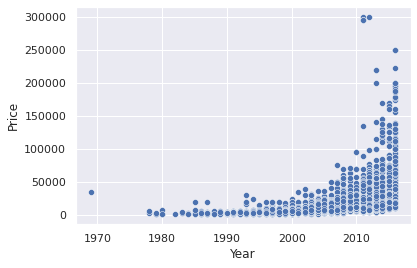

In [18]:
sns.scatterplot(df_with_dummies['Year'],df_with_dummies['Price'])